# ***Project Name - “Restaurant Data Insights and Analysis using Python”***

# ***Project Summary***

### 🧾 Project Summary: Restaurant Data Insights and Visualization

This project, completed as part of the **Cognifyz Technologies Data Analysis Internship**, focuses on extracting actionable insights from a restaurant dataset using **Python (Pandas, Matplotlib, Seaborn, GeoPandas)**.  
The analysis covers data cleaning, exploration, visualization, and insight generation across multiple dimensions such as cuisines, cities, pricing, ratings, and delivery options.

---

#### 🔹 Key Objectives
- Analyze restaurant trends across different cities and cuisines.  
- Identify customer preferences and restaurant performance metrics.  
- Visualize geographical restaurant distributions and service offerings.  
- Explore relationships between ratings, votes, and delivery services.  

---

#### 🔹 Project Workflow

##### **Level 1 – Exploratory Analysis**
- Determined **Top 3 cuisines** and their percentage shares.  
- Identified **cities with the highest restaurant counts and ratings**.  
- Analyzed **price range distributions** among restaurants.  
- Compared **average ratings for restaurants with vs. without online delivery**.

##### **Level 2 – Advanced Analysis**
- Studied **restaurant ratings distribution and vote patterns**.  
- Detected **common cuisine combinations** and their popularity.  
- Performed **geographic mapping** using GeoPandas to locate clusters.  
- Evaluated **restaurant chains** based on ratings and outlet counts.

##### **Level 3 – Insight Generation**
- Extracted **positive and negative review keywords** using text analysis.  
- Found correlations between **votes and aggregate ratings**.  
- Examined **relationships between price range and services** (online delivery & table booking).  

---

#### 🔹 Key Visualizations
- **Bar Charts & Pie Charts** for categorical insights (Top cuisines, Cities, Price range).  
- **Heatmaps** and **GeoMaps** for geographic distribution of restaurants.  
- **Scatter & Correlation Plots** for ratings vs. votes analysis.  
- **Word Clouds** for positive and negative review terms.  
- **Color-enhanced professional charts** styled for corporate dashboards.  

---

#### 🔹 Tools & Technologies
- **Python Libraries:** Pandas, NumPy, Matplotlib, Seaborn, GeoPandas, Plotly  
- **Data Visualization:** Power BI–style chart formatting  
- **Dataset:** Zomato Restaurant Dataset (sample provided by Cognifyz Technologies)

---

#### 🔹 Key Insights
- Majority of restaurants fall within **mid-range pricing** and offer **online delivery**.  
- **Top cuisines** include North Indian, Chinese, and Fast Food.  
- **Higher-priced restaurants** tend to receive **better ratings**.  
- Cities with higher restaurant density also show diverse cuisine availability.  


# ***Level 1***

In [120]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# import the file
path = "/content/drive/MyDrive/Internship/Dataset.csv"
df = pd.read_csv(path)
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### ***Task 1: Top Cuisines***

#### Quiz 1:

Determine the top three most common cuisines in the dataset.

In [123]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [124]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [125]:
cuisine_count = df['Cuisines'].str.split(',').explode('Cuisines').value_counts()
print(cuisine_count)
top_cuisine = cuisine_count.head(3)
print("The top 3 Cuisines are : ",top_cuisine)

Cuisines
North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
Patisserie           1
 D�_ner              1
Turkish Pizza        1
 B�_rek              1
 World Cuisine       1
Name: count, Length: 249, dtype: int64
The top 3 Cuisines are :  Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


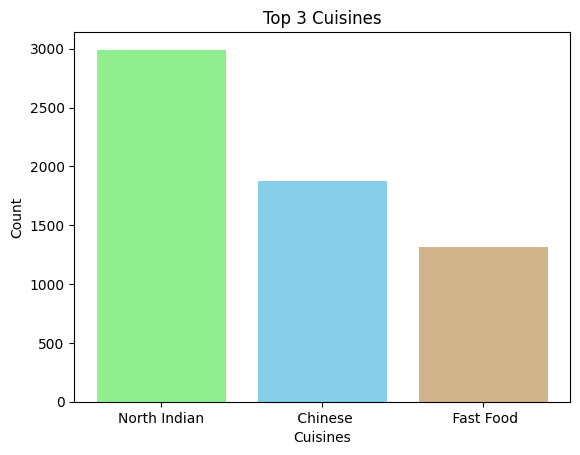

In [126]:
Colours = ['lightgreen','skyblue','tan','pink','gray']
plt.bar(top_cuisine.index,top_cuisine.values,color=Colours)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 3 Cuisines')
plt.show()

#### Quiz 2:


Calculate the percentage of restaurants that sserve each of the top cuisines.

In [127]:
total_restaurant = len(df)
print(total_restaurant)
top_cuisine10 = cuisine_count.head()
percentages = (top_cuisine10 / total_restaurant) * 100
print("The Market share of Top 5 Cuisines are : ",percentages)

9551
The Market share of Top 5 Cuisines are :  Cuisines
North Indian     31.326563
 Chinese         19.683803
 Fast Food       13.757722
 North Indian    10.135064
Chinese           8.951942
Name: count, dtype: float64


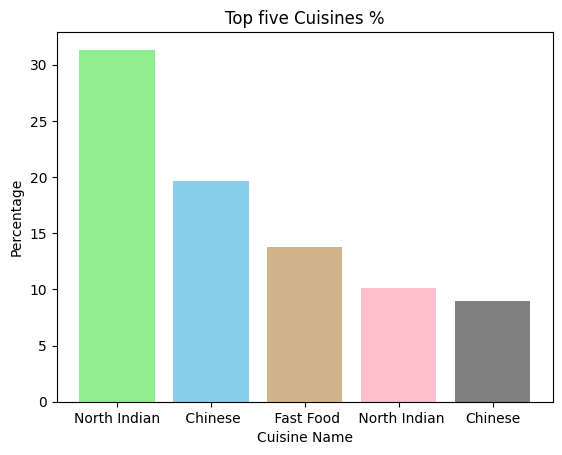

<Figure size 1200x600 with 0 Axes>

In [128]:
plt.bar(top_cuisine10.index, percentages.values, color = Colours)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Top five Cuisines %')
plt.figure(figsize=(12,6))
plt.show()

### ***Task 2 : City Analysis***

#### ***Quiz 1***

Identify the city with the highest number of restaurants in the dataset

In [129]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [130]:
city_count = df['City'].value_counts()
restaurants_no = city_count.head(1)
print("City with the highest number of restaurants : ",city_count.idxmax())
print(restaurants_no)

City with the highest number of restaurants :  New Delhi
City
New Delhi    5473
Name: count, dtype: int64


#### ***Quiz 2***

Calculate the average rating for restaurants in each city.

In [131]:
rating_by_each_city = df.groupby('City')['Aggregate rating'].mean()
print("The average rating of each city : ",rating_by_each_city)

The average rating of each city :  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


#### ***Quiz 3***

Determine the city with the highest average rating.

In [132]:
top_rated_city = rating_by_each_city.idxmax()
value = rating_by_each_city.max()
print("The city with the highest average rating : ",top_rated_city,',','Rating =',value)


The city with the highest average rating :  Inner City , Rating = 4.9


### ***Task 3 : Price Range Distribution***

#### ***Quiz 1***

Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

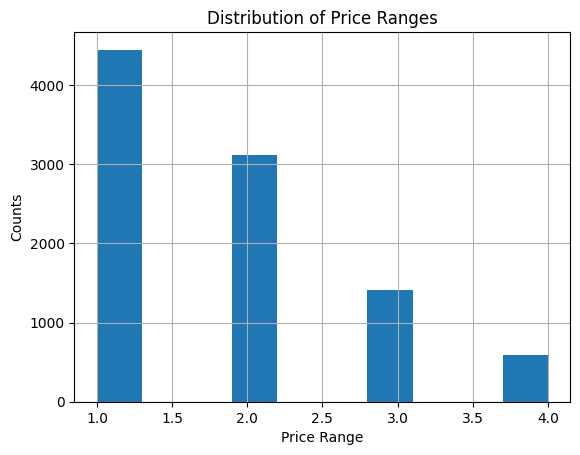

In [133]:
df.hist(column="Price range")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()


#### ***Quiz 2***

Calculate the percentage of restaurants in each price range category.

In [134]:
print("The % of Restaurant in each Price Range Category are: ")
price_range_count = df['Price range'].value_counts()
total_restaurant = len(df)
percentage = round((price_range_count/total_restaurant) * 100,2)
percentage_m = pd.merge(price_range_count,percentage,on='Price range')
percentage_m.columns = ['Count','Percentage']
print(percentage_m)

The % of Restaurant in each Price Range Category are: 
             Count  Percentage
Price range                   
1             4444       46.53
2             3113       32.59
3             1408       14.74
4              586        6.14


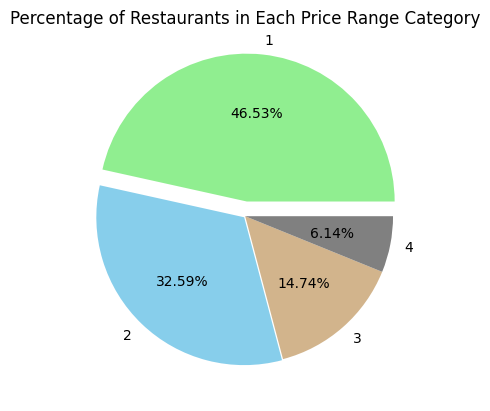

In [135]:
plt.pie(percentage,labels=percentage_m.index,autopct='%1.2f%%',colors=['lightgreen','skyblue','tan','gray'],explode=(0.1,0.01,0,0))
plt.title("Percentage of Restaurants in Each Price Range Category")
plt.show()

### ***Task 4: Online Delivery***

#### ***Quiz 1***

Determine the percentage of restaurants that offer online delivery.

In [136]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)
print('Total Resturent with Online Delivery : ',online_delivery)

Total Resturent with Online Delivery :  2451


In [137]:
no = df['Has Online delivery'].value_counts().get('No',0)
print("Resurent with NO Online Delivery : ",no)

total_restaurants = len(df)
percentage_online = (online_delivery / total_restaurants) * 100
percentage_no_online = (no / total_restaurants) * 100

print(f"Percentage of restaurants with online delivery: {percentage_online:.2f}%")
print(f"Percentage of restaurants without online delivery: {percentage_no_online:.2f}%")

Resurent with NO Online Delivery :  7100
Percentage of restaurants with online delivery: 25.66%
Percentage of restaurants without online delivery: 74.34%


#### ***Quiz 2***

Compare the average ratings of restaurants with and without online delivery.

In [138]:
Avg_rating_yes = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
Avg_rating_no = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print("Average Rating of Restaurant with Online Delivery : ",Avg_rating_yes)
print("Average Rating of Restaurant without Online Delivery : ",Avg_rating_no)


Average Rating of Restaurant with Online Delivery :  3.25
Average Rating of Restaurant without Online Delivery :  2.47


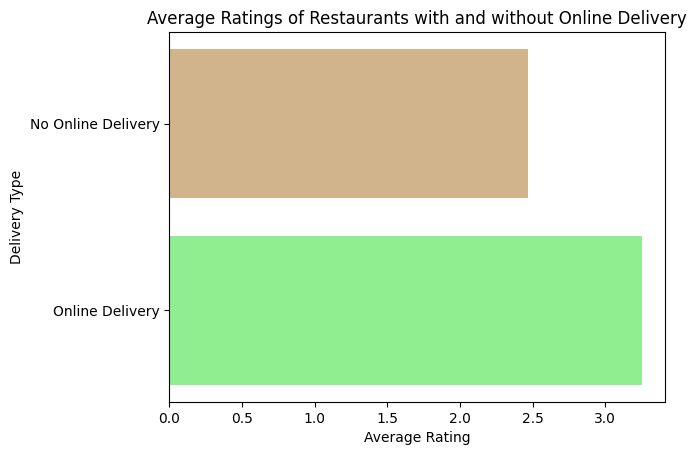

In [139]:
labels = ['Online Delivery', 'No Online Delivery']
values = [Avg_rating_yes, Avg_rating_no]
color = ['lightgreen','tan']
plt.barh(labels, values,color=color)
plt.xlabel('Average Rating')
plt.ylabel('Delivery Type')
plt.title('Average Ratings of Restaurants with and without Online Delivery')
plt.show()

# ***Level 2***

### ***Task 1: Restaurant Ratings***

#### ***Quiz 1***

Analyze the distribution of aggregate ratings and determine the most common
rating range.

In [140]:
agg_rating_distribution = df['Aggregate rating'].value_counts()
print(agg_rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [141]:
a = agg_rating_distribution.idxmax()
print("Most common rating range is : ",a)

Most common rating range is :  0.0


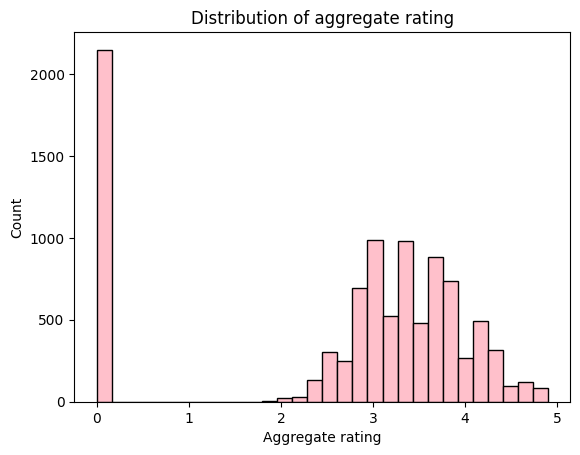

In [142]:
plt.hist(df['Aggregate rating'],bins = 30,color = 'pink',edgecolor ='black')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title("Distribution of aggregate rating")
plt.show()

#### ***Quiz 2***

Calculate the average number of votes received by restaurants.

In [143]:
avg_vote = round(df['Votes'].mean(),3)
print("The average number of votes recevied by restaurants : ", avg_vote)

The average number of votes recevied by restaurants :  156.91


### ***Task 2 : Cuisine Combination***

#### ***Quiz 1***

Identify the most common combinations of cuisines in the dataset.

In [144]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top10=common_combinations.head(10)
print("Top 10 most common combinations are : ",top10)

Top 10 most common combinations are :  Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


#### ***Quiz 2***

Determine if certain cuisine combinations tend to have higher ratings.

In [145]:
max_rating = common_combinations.iloc[0]
print("The Max Rating is : ",max_rating)

The Max Rating is :  4.9


In [146]:
max_rated_rest = df.loc[df['Aggregate rating'] == max_rating]
print("Restaurants having the maximum rating : ",max_rated_rest['Restaurant Name'])

Restaurants having the maximum rating :  3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


### ***Task 3 : Geographic Analysis***

#### ***Quiz 1***

Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [147]:
print(df[["Longitude","Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


#### ***Quiz 2***

Identify any patterns or clusters of restaurants in specific areas.

In [148]:
gdf = geopandas.GeoDataFrame(
    df, geometry= geopandas.points_from_xy(df.Longitude, df.Latitude),crs = "EPSG:4326"
)

In [149]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

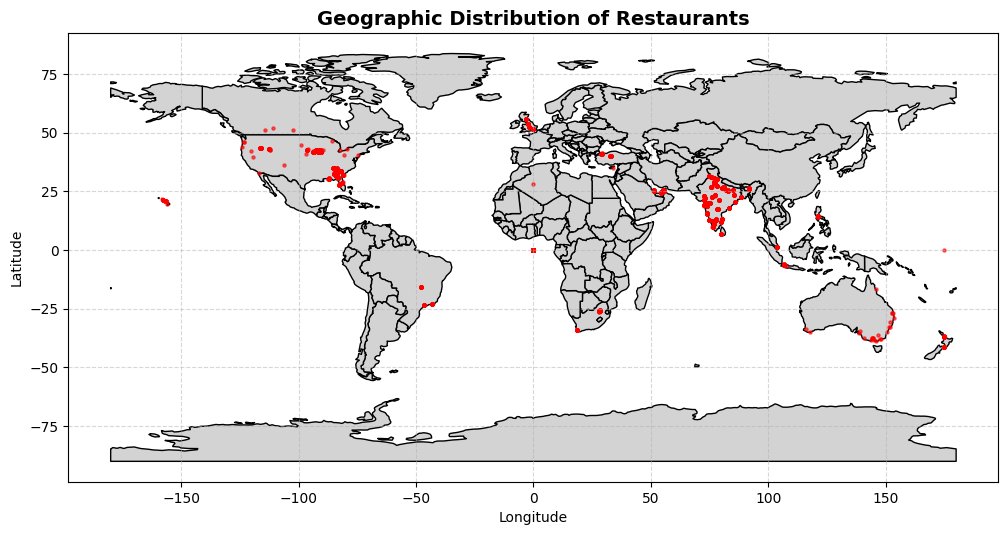

In [150]:
import geopandas as gpd

# Download world basemap directly from Natural Earth (fixed for GeoPandas ≥1.0)
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Convert your data into GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Plot map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.6)

plt.title("Geographic Distribution of Restaurants", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### ***Task 4 : Restaurant Chains***

#### ***Quiz 1***

Identify if there are any restaurant chains present in the dataset.

In [151]:
restaurant_chain = df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new = restaurant_chain[restaurant_chain["OutletCount"] > 1]
restaurant_chain = new.sort_values(by="OutletCount",ascending=False)
print(restaurant_chain[["Restaurant Name","OutletCount"]].head(10))


       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


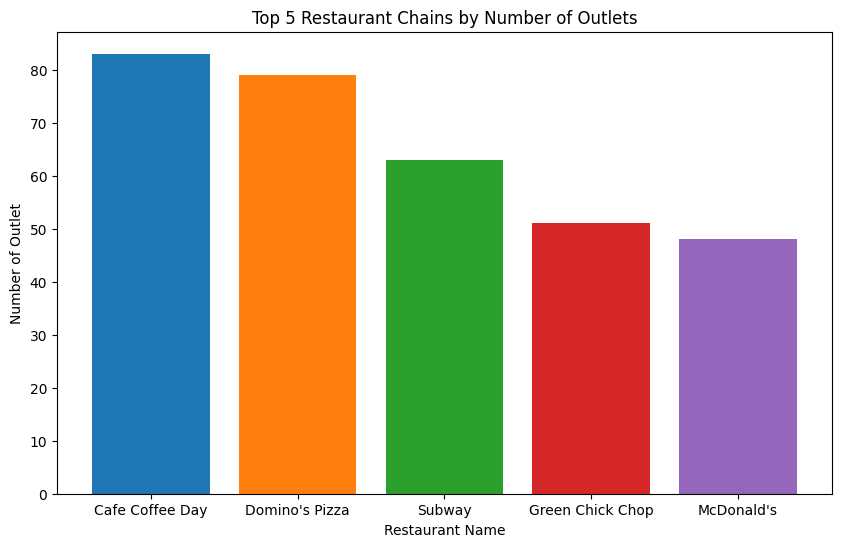

In [152]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # blue, orange, green, red, purple
plt.figure(figsize=(10,6))
plt.bar(restaurant_chain["Restaurant Name"][:5],restaurant_chain["OutletCount"][:5],color = colors)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Outlet")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

#### ***Quiz 2***

Analyze the ratings and popularity of different restaurant chains.

In [153]:
rating = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating",ascending=False)
print(rating)

                               Restaurant Name  Average Rating
5946                                    Solita             4.9
6045  Spiral - Sofitel Philippine Plaza Manila             4.9
2354                                 Flat Iron             4.9
5477                     Sagar Gaire Fast Food             4.9
651                                        Bao             4.9
...                                        ...             ...
6032                             Spices Affair             0.0
6034                              Spicy Affair             0.0
6035                               Spicy Curry             0.0
757                            Bhashi Caterers             0.0
761                         Bhawani Restaurant             0.0

[7446 rows x 2 columns]


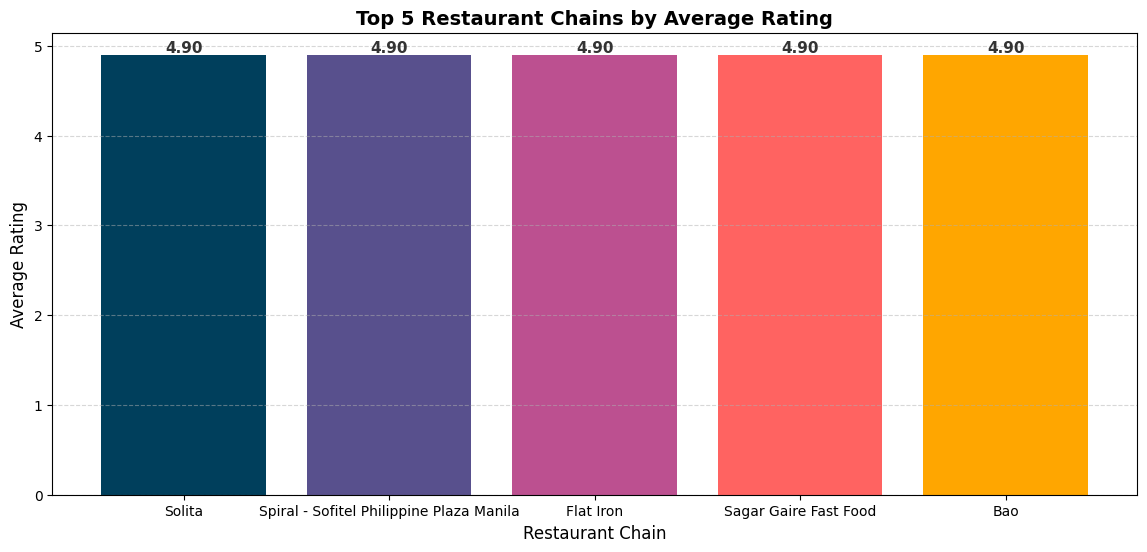

In [154]:
# Modern corporate colors
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

plt.figure(figsize=(14,6))
plt.bar(
    rating["Restaurant Name"][:5],
    rating["Average Rating"][:5],
    color=colors
)

plt.xlabel("Restaurant Chain", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Top 5 Restaurant Chains by Average Rating", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optional: Add value labels on top of bars
for i, val in enumerate(rating["Average Rating"][:5]):
    plt.text(i, val + 0.03, f"{val:.2f}", ha='center', fontsize=11, fontweight='bold', color='#333333')

plt.show()


In [155]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name = "Total Votes").sort_values(by="Total Votes",ascending=False)
print(votes)

                 Restaurant Name  Total Votes
663              Barbeque Nation        28142
101    AB's - Absolute Barbecues        13400
6943                        Toit        10934
785                    Big Chill        10853
2297                  Farzi Cafe        10098
...                          ...          ...
2525  Frugurpop-  ibis New Delhi            0
2522               Frozen Grillz            0
953          Break Fast Junction            0
4959                   Pizza Hot            0
4949              Piyu Fast Food            0

[7446 rows x 2 columns]


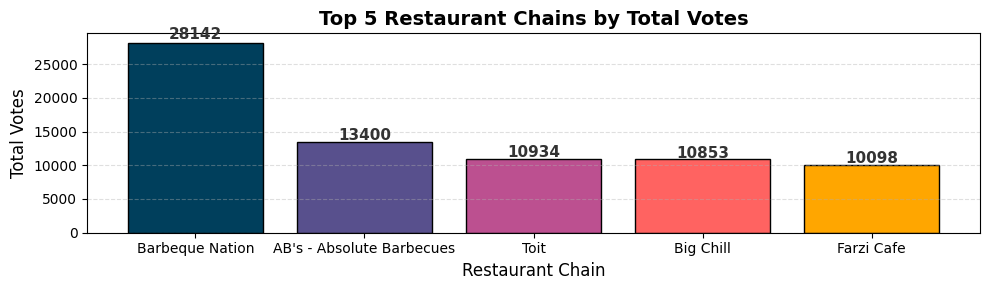

In [156]:
# Professional Power BI color palette
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

plt.figure(figsize=(10,3))
plt.bar(
    votes["Restaurant Name"][:5],
    votes["Total Votes"][:5],
    color=colors,
    edgecolor='black'
)

plt.xlabel("Restaurant Chain", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)
plt.title("Top 5 Restaurant Chains by Total Votes", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add numeric labels on top of bars
for i, val in enumerate(votes["Total Votes"][:5]):
    plt.text(i, val + (val * 0.02), str(val), ha='center', fontsize=11, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()


# ***Level 3***

In [157]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


### ***Task 1: Restaurant Reviews***

Analyze the text reviews to identify the most common positive and negative keywords.

In [158]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

Rating text
Average      3737
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64


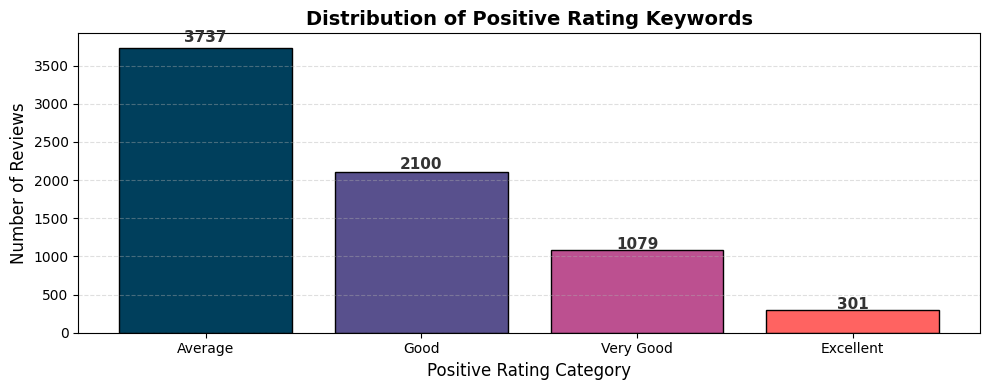

In [159]:
# Count of each positive keyword
keyword_counts = positive_data['Rating text'].value_counts()

print(keyword_counts)
# Power BI style color palette
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

plt.figure(figsize=(10,4))
plt.bar(keyword_counts.index, keyword_counts.values, color=colors[:len(keyword_counts)], edgecolor='black')

plt.xlabel("Positive Rating Category", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Distribution of Positive Rating Keywords", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels above each bar
for i, val in enumerate(keyword_counts.values):
    plt.text(i, val + (val * 0.02), str(val), ha='center', fontsize=11, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()


Rating text
Poor    186
Name: count, dtype: int64


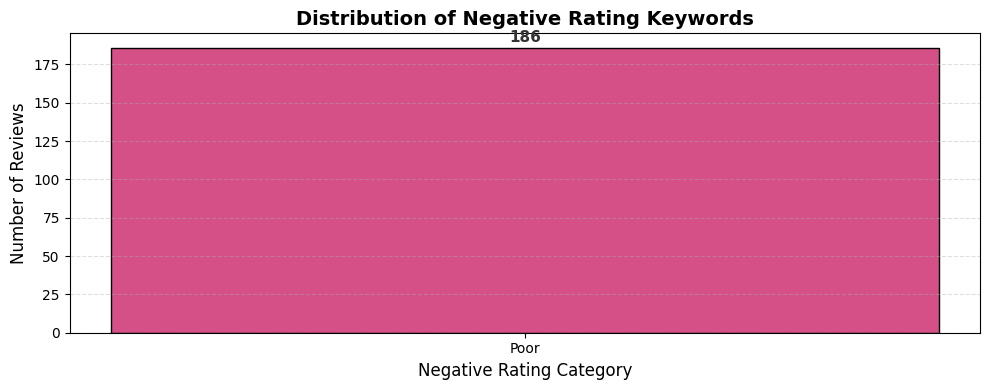

In [160]:
# Filter negative reviews
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]

# Count occurrences of each negative rating text
neg_keyword_counts = negative_data['Rating text'].value_counts()
print(neg_keyword_counts)

# power BI-style distinct color palette
colors = ['#d45087', '#f95d6a', '#ff7c43', '#ffa600', '#bc5090']

plt.figure(figsize=(10,4))
plt.bar(
    neg_keyword_counts.index,
    neg_keyword_counts.values,
    color=colors[:len(neg_keyword_counts)],
    edgecolor='black'
)

plt.xlabel("Negative Rating Category", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.title("Distribution of Negative Rating Keywords", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add numeric labels above bars
for i, val in enumerate(neg_keyword_counts.values):
    plt.text(i, val + (val * 0.02), str(val), ha='center', fontsize=11, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()


### ***Task 2 : Votes Analysis***

#### ***Quiz 1***

Identify the restaurants with the highest and lowest number of votes.

In [161]:
Highest_voted_resturant = df.groupby("Restaurant Name")['Votes'].sum().sort_values(ascending=False)
Highest_voted_resturant = Highest_voted_resturant.idxmax()
print("The Highest Voted Resturent is : ",Highest_voted_resturant)

The Highest Voted Resturent is :  Barbeque Nation


In [162]:
lowest_rated_resturant = df.groupby("Restaurant Name")['Votes'].sum().sort_values()
lowest_rated_resturant = lowest_rated_resturant.idxmin()
print("The Lowest Voted Resturant is : ",lowest_rated_resturant)

The Lowest Voted Resturant is :  Breaky2Dinner


#### ***Quiz 2***

Analyze if there is a correlation between the number of votes and the rating of a restaurant.

[[1.   0.31]
 [0.31 1.  ]]


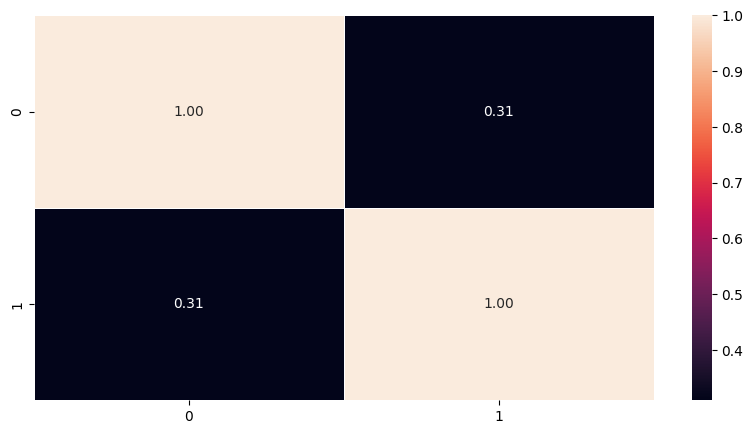

In [163]:
corelation = np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation = np.round(corelation,2)
print(corelation)

plt.figure(figsize=(10,5),dpi = 100)
sns.heatmap(corelation,annot=True,fmt = ".2f",linewidth=.4)
plt.show()

As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variables.


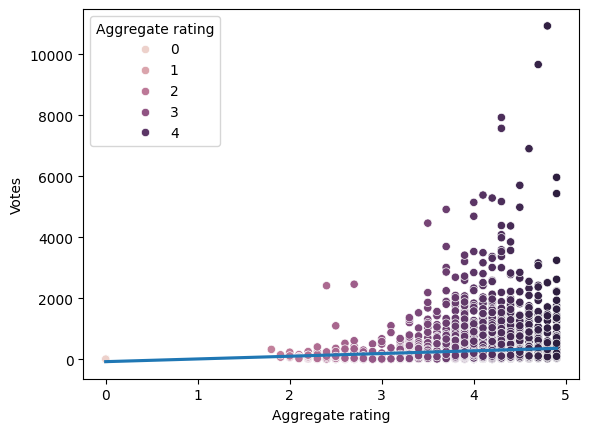

In [164]:
sns.scatterplot(data=df,y = 'Votes',hue = 'Aggregate rating',x = 'Aggregate rating')
sns.regplot(data = df,x = 'Aggregate rating',y = 'Votes',scatter = False)
print("As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variables.")
plt.show()

### ***Task 3: Price Range Vs. Online Delivery and Table Booking***

#### ***Quiz 1***

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

To Analyzed this we need to plot 2 Charts together

In [165]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

*   Plot 1 for Online Delivery with the avg cost.
*   Plot 2 for Table Booking with the avg cost.

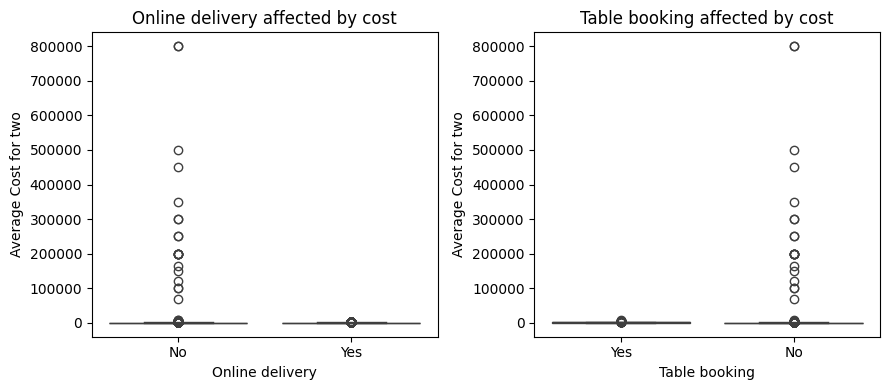

In [166]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1,y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

In [167]:
print("Both the Online delivery and Table booking are negetively impacted by the cost")

Both the Online delivery and Table booking are negetively impacted by the cost


#### ***Quiz 2***

Determine if higher-priced restaurants are more likely to offer these services.

*   Let's Check for the resturents have avg cost less than 10,000

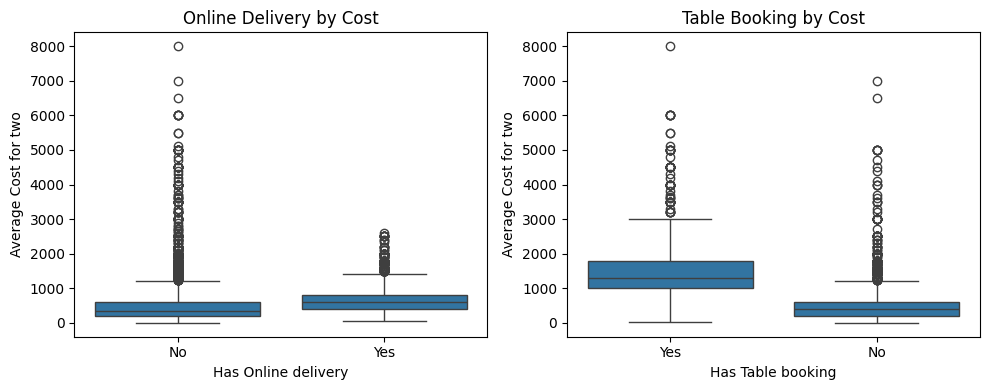

In [168]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1,y='Average Cost for two',data=df.loc[df['Average Cost for two']< 10000])
plt.title('Online Delivery by Cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y='Average Cost for two',data=df.loc[df['Average Cost for two']<10000])
plt.title('Table Booking by Cost')
plt.tight_layout()
plt.show()


In [169]:
print("The Online Delivery facility is present for only those resturant, Where the average cost is less than 1000. ")
print("The Table Booking facility is available in restaurents with an average cost ranging from 1000 to 2000.")

The Online Delivery facility is present for only those resturant, Where the average cost is less than 1000. 
The Table Booking facility is available in restaurents with an average cost ranging from 1000 to 2000.


# ***Conclusion***

This project successfully analyzed restaurant data as part of the **Cognifyz Technologies Data Analysis Internship**.  
Through a combination of **data exploration, visualization, and statistical insights**, valuable patterns were discovered regarding restaurant performance, pricing, delivery options, and customer preferences.

The analysis revealed that:
- **Mid-range priced restaurants** dominate the market and attract the highest customer engagement.  
- **Popular cuisines** such as North Indian, Chinese, and Fast Food appear most frequently across top-rated cities.  
- **Higher aggregate ratings** are often associated with restaurants offering **online delivery and table booking** services.  
- **Restaurant chains** tend to have more consistent ratings and stronger customer trust.  

The project demonstrates the practical use of **Python-based data analysis and visualization tools** — including Pandas, Matplotlib, Seaborn, and GeoPandas — to generate business insights and improve decision-making.

Overall, this internship project strengthened skills in **data wrangling, exploratory data analysis (EDA), and visual storytelling**, proving essential for real-world data analytics roles.


# ***End This Project.***